## 1. Tensorflow 설치


In [1]:
import tensorflow as tf

In [2]:
import shutil
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!python --version

Python 3.8.10


In [ ]:
tf.__version__

'2.11.0'

## 2. Load Saved Model

버킷에서 모델 로드하기 (-> 모델 저장된 경로에 맞게 코드 수정)

In [3]:
# 계정 연결
from google.colab import auth
auth.authenticate_user()

In [4]:
!gsutil ls gs://kfood150_all_images

gs://kfood150_all_images/kfood150.zip
gs://kfood150_all_images/kfood150/
gs://kfood150_all_images/model/


In [4]:
os.getcwd()

'/content'

In [5]:
# 저장된 모델 로컬에 다운로드
!gsutil cp -r gs://kfood150_all_images/model/ .

Copying gs://kfood150_all_images/model/fingerprint.pb...
Copying gs://kfood150_all_images/model/keras_metadata.pb...
Copying gs://kfood150_all_images/model/saved_model.pb...
Copying gs://kfood150_all_images/model/variables/variables.data-00000-of-00001...
- [4 files][ 13.8 MiB/ 13.8 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying gs://kfood150_all_images/model/variables/variables.index...
- [5 files][ 13.9 MiB/ 13.9 MiB]                                                
Operation completed over 5 objects/13.9 MiB.                                     


In [ ]:
# Prediction에 쓸 샘플 이미지 로컬에 다운로드
!gsutil cp -r gs://kfood150_all_images/kfood150/ .

## 3. Prediction

In [7]:
new_model = tf.keras.models.load_model('/content/model')  # 예측 모델 저장

# Check its architecture 모델 구조 확인
new_model.summary()
'''
 input: (batch_size, 224, 224, 3)
 output: (batch_size, 150)
 num_classes: 150개
'''

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

'\n input: (batch_size, 224, 224, 3)\n output: (batch_size, 150)\n num_classes: 150개\n'

In [8]:
# 전처리 함수
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

def proprecessing(test_image_path, IMAGE_SIZE):
  test_image = cv2.imread(test_image_path)
  test_image = cv2.resize(test_image, (IMAGE_SIZE, IMAGE_SIZE))
  test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
  test_image = preprocess_input(test_image)
  test_image = tf.expand_dims(test_image, 0)

  return test_image

In [9]:
# 예측할 이미지 파일 경로; jpg, JPG 파일 권장
test_image_path = "/content/kfood150/Img_001_0020.jpg"   

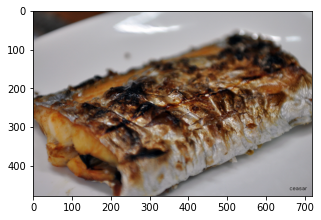

In [10]:
# test 이미지 원본 보기
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure(figsize=(5,5))

image = img.imread(test_image_path)
plt.imshow(image)
plt.show()

In [11]:
# image preprocessing
IMAGE_SIZE = 224
test_image = proprecessing(test_image_path,IMAGE_SIZE)

print('test image shape:',test_image.shape)   # (1,224,224,3)

test image shape: (1, 224, 224, 3)


In [13]:
# predict label
pre_label = np.argmax(new_model.predict(test_image))

1/1 [==============================] - 0s 74ms/step


In [14]:
print(pre_label)

1
